# Assignment 3
CPSC 499 Applied Machine Learning
Marshall Brown, 230158096
March 11, 2024

In [3]:
import io
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score

## Data Set Exploration

In [4]:
data = pd.read_csv("Churn_Modelling.csv")

# Displaying the first few rows of the data
print(data.head())

FileNotFoundError: [Errno 2] No such file or directory: 'Churn_Modelling.csv'

In [ ]:
# Summary of data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB
None


In [ ]:
# Description of data
data.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002,10002.000000,10001,10002,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5001.499600,1.569093e+07,NaN,650.555089,NaN,NaN,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,NaN,96.661615,NaN,NaN,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000


### Data Preprocessing

Let's drop some columns that are not needed

In [ ]:
# dropping column that is not helpful. RowNumber does not provide any useful info to the model.
data = data.drop("RowNumber", axis=1)

#checking to see if we have rows with nulls
data.isna().sum()



CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

We see that there are some null values. becuase there are so few, we can just drop them.

In [ ]:
# dropping rows with nulls
data = data.dropna()

# checking
data.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# finding how many duplicate rows we have
data.duplicated().sum()

2

In [ ]:
# dropping duplicate rows
data = data.drop_duplicates()

# checking
data.duplicated().sum()

0

The surname column is not expected to be helpful in prediction. Maybe there is a correlation between the length of the name and exiting. Let's replace the name with the length of the name

In [ ]:
# replacing the surname with its length
data[data.columns[data.columns.get_loc('Surname')]] = data['Surname'].apply(lambda x: len(str(x)))

In [ ]:
print(data.head())

   CustomerId  Surname  CreditScore Geography  Gender   Age  Tenure  \
0    15634602        8          619    France  Female  42.0       2   
1    15647311        4          608     Spain  Female  41.0       1   
2    15619304        4          502    France  Female  42.0       8   
3    15701354        4          699    France  Female  39.0       1   
5    15574012        3          645     Spain    Male  44.0       8   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1        1.0             1.0        101348.88   
1   83807.86              1        0.0             1.0        112542.58   
2  159660.80              3        1.0             0.0        113931.57   
3       0.00              2        0.0             0.0         93826.63   
5  113755.78              2        1.0             0.0        149756.71   

   Exited  
0       1  
1       0  
2       1  
3       0  
5       1  


### Correlations and visualization

Let's look at the data correlations. first we split the data into numeric and categorical, then we will look at correlations.

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])



In [ ]:
corr = numeric_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,-0.015529,0.005686,0.009394,-0.014821,-0.012665,0.016911,-0.013679,0.001731,0.015081,-0.006284
Surname,-0.015529,1.000000,-0.003900,0.019675,-0.000197,0.015731,0.002042,0.001838,0.001551,-0.005675,0.013103
CreditScore,0.005686,-0.003900,1.000000,-0.004118,0.000918,0.006459,0.012447,-0.005972,0.025413,-0.001082,-0.026975
Age,0.009394,0.019675,-0.004118,1.000000,-0.010133,0.028469,-0.030885,-0.011669,0.085422,-0.007049,0.285413
Tenure,-0.014821,-0.000197,0.000918,-0.010133,1.000000,-0.011958,0.013230,0.022626,-0.028202,0.007789,-0.014092
Balance,-0.012665,0.015731,0.006459,0.028469,-0.011958,1.000000,-0.304116,-0.014733,-0.010238,0.012731,0.118641
NumOfProducts,0.016911,0.002042,0.012447,-0.030885,0.013230,-0.304116,1.000000,0.003375,0.009635,0.014292,-0.047840
HasCrCard,-0.013679,0.001838,-0.005972,-0.011669,0.022626,-0.014733,0.003375,1.000000,-0.011908,-0.009848,-0.007120
IsActiveMember,0.001731,0.001551,0.025413,0.085422,-0.028202,-0.010238,0.009635,-0.011908,1.000000,-0.011147,-0.155969
EstimatedSalary,0.015081,-0.005675,-0.001082,-0.007049,0.007789,0.012731,0.014292,-0.009848,-0.011147,1.000000,0.011955


### Label Encoding

Let's encode these labels

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
enc = LabelEncoder()

categorical_features = ["Geography", "Gender", "Tenure", "HasCrCard", "IsActiveMember"]

for cat_feat in categorical_features:
    data[cat_feat] = enc.fit_transform(data[cat_feat])

print(data.head())

   CustomerId  Surname  CreditScore  Geography  Gender   Age  Tenure  \
0    15634602        8          619          0       0  42.0       2   
1    15647311        4          608          2       0  41.0       1   
2    15619304        4          502          0       0  42.0       8   
3    15701354        4          699          0       0  39.0       1   
5    15574012        3          645          2       1  44.0       8   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
5  113755.78              2          1               0        149756.71   

   Exited  
0       1  
1       0  
2       1  
3       0  
5       1  


Now we will scale the data using the standardScaler

In [ ]:
scaler = StandardScaler()

numerical_cols = ["CustomerId", "CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]


data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print(data.head())

   CustomerId  Surname  CreditScore  Geography  Gender       Age    Tenure  \
0   -0.783366        8    -0.326054          0       0  0.293570 -1.041870   
1   -0.606667        4    -0.439902          2       0  0.198222 -1.387627   
2   -0.996060        4    -1.536986          0       0  0.293570  1.032669   
3    0.144715        4     0.501933          0       0  0.007526 -1.387627   
5   -1.625773        3    -0.056958          2       1  0.484266  1.032669   

    Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0 -1.225699      -0.911557   0.646119        0.970619         0.021599       1  
1  0.117505      -0.911557  -1.547702        0.970619         0.216237       0  
2  1.333214       2.526905   0.646119       -1.030270         0.240389       1  
3 -1.225699       0.807674  -1.547702       -1.030270        -0.109199       0  
5  0.597486       0.807674   0.646119       -1.030270         0.863322       1  


## Modelling Time.
Let's make some models to train on our cleaned and processed data.

### splitting data
We split the data into train and test sets.

In [ ]:
X = data.drop(columns=['Exited'])
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# checking to see if it was split correctly
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (7996, 12)
Shape of X_test: (2000, 12)
Shape of y_train: (7996,)
Shape of y_test: (2000,)


### Decision Tree

making tree classifier and using cross validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Create Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Perform cross-validation to evaluate the model
dt_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)

# Mean accuracy across folds
print("Mean Accuracy (Decision Tree):", dt_scores.mean())
print("standard Deviation Accuracy (Decision Tree):", dt_scores.std())



Mean Accuracy (Decision Tree): 0.7832673545966229
standard Deviation Accuracy (Decision Tree): 0.003965753411691217


very low standard deviation above is encouraging.

#### Finding Best Hyperparameters for DT

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
}

# GridSearchCV for Decision Tree
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)

# Best parameters for Decision Tree
print("Best Parameters (Decision Tree):", dt_grid_search.best_params_)
print("Best Score (Decision Tree):", dt_grid_search.best_score_)

Best Parameters (Decision Tree): {'max_depth': 10}
Best Score (Decision Tree): 0.8350428392745466


we see that the best max_depth is 10. We will use that below.

#### making final (best) decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the Decision Tree classifier with the best parameters
best_dt_classifier = DecisionTreeClassifier(max_depth=10)

# Train the model on the full training set
best_dt_classifier.fit(X_train, y_train)

# Evaluate the model on the testing set
dt_test_accuracy = best_dt_classifier.score(X_test, y_test)
print("Test Accuracy (Decision Tree):", dt_test_accuracy)

Test Accuracy (Decision Tree): 0.834


### Logistic Regression

#### making the model and using cross validation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Create Logistic Regression classifier
logreg_classifier = LogisticRegression()

# Perform cross-validation for Logistic Regression classifier
logreg_scores = cross_val_score(logreg_classifier, X_train, y_train, cv=5)  # cv=5 for 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores (Logistic Regression):", logreg_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean Accuracy (Logistic Regression):", logreg_scores.mean())
print("Standard Deviation of Accuracy (Logistic Regression):", logreg_scores.std())


Cross-Validation Scores (Logistic Regression): [0.808125   0.80050031 0.81113196 0.80362727 0.80737961]
Mean Accuracy (Logistic Regression): 0.8061528298936835
Standard Deviation of Accuracy (Logistic Regression): 0.0037017720012696167


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2'],  # Penalty term ('l2' for L2 regularization)
    'solver': ['lbfgs', 'liblinear', 'saga']  # Solver ('lbfgs', 'liblinear', or 'saga')
}

# GridSearchCV for Logistic Regression
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters for Logistic Regression
print("Best Parameters (Logistic Regression):", grid_search.best_params_)
print("Best Score (Logistic Regression):", grid_search.best_score_)


Best Parameters (Logistic Regression): {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score (Logistic Regression): 0.8064026735459663


#### making final (best) Logistic Regression Model

In [ ]:
best_logreg_classifier = LogisticRegression(C=0.1, penalty='l2', solver='lbfgs')

logreg_classifier.fit(X_train, y_train)

# Predict labels for the testing set
y_pred = logreg_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)


Accuracy: 0.806
F1 Score: 0.2567049808429119
Recall: 0.16381418092909536


## Prediction and Evaluation
I'll start by copying the code for the best models, then printing and comparing the evaluation metrics for each model.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Train the model on the full training set
best_dt_classifier.fit(X_train, y_train)

# Predict labels for the testing set
y_pred = best_dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Accuracy: 0.8345
F1 Score: 0.5153733528550514
Recall: 0.43031784841075793


### Comparison of Models


#### Logistic Regression:
Accuracy: 0.806  
F1 Score: 0.2567049808429119  
Recall: 0.16381418092909536  


#### Decision Tree:
Accuracy: 0.8345  
F1 Score: 0.5153733528550514  
Recall: 0.43031784841075793  


We see that both models are fairly good atcrrectly identifying the positives and have corresponding accuracies. Both models however really struggle with high rates of false negatives. That is, both have poor recall scores; the logistic regression model's is dismal.

The decision tree model out performs my linear regression model, but is by no means perfect, missing more than half of the positives.


### Finding most important features in the decision tree classifier

Top 5 Most Important Features:
Age: 0.3169207746731288
NumOfProducts: 0.1989665505459935
Balance: 0.10014776339137968
IsActiveMember: 0.09005510648037601
CreditScore: 0.06866440532326218


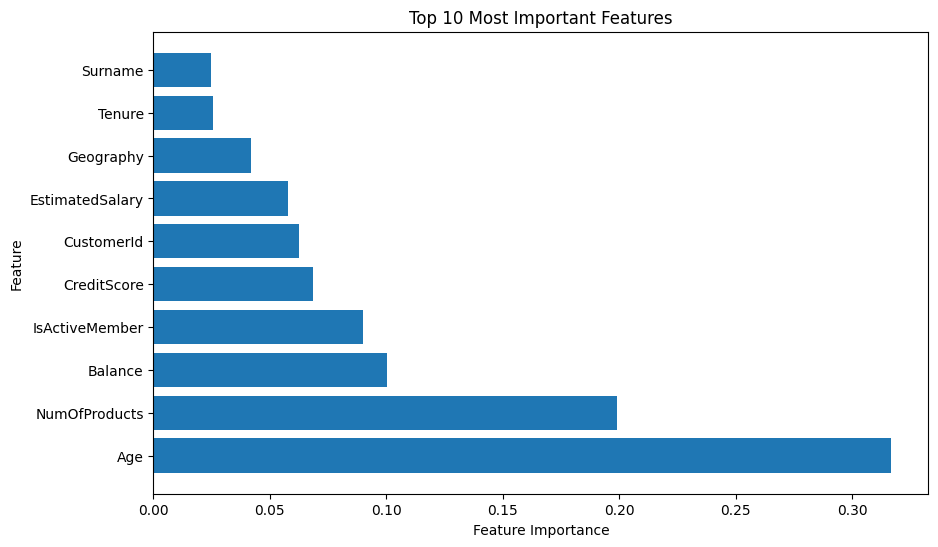

In [ ]:
feature_importances = best_dt_classifier.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a dictionary mapping feature names to their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort features by their importances
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the most important features
print("Top 5 Most Important Features:")
for feature, importance in sorted_features[:5]:
    print(f"{feature}: {importance}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features[:10])), [imp for _, imp in sorted_features[:10]], align='center')
plt.yticks(range(len(sorted_features[:10])), [feat for feat, _ in sorted_features[:10]])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.show()